*This python notebook is intended for learning purpose only.*

*The learning is based on Learn Python for Data Science by Siraj Raval.*

***Source:*** *https://www.youtube.com/watch?v=T5pRlIbr6gg&list=PL2-dafEMk2A6QKz1mrk1uIGfHkC1zZ6UU*

- - -

## Introduction - #1

['male' 'female']


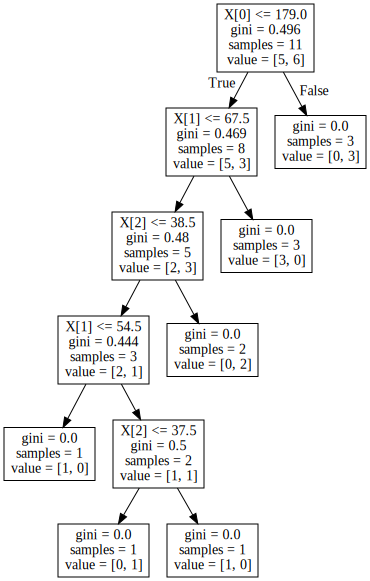

In [3]:
from sklearn import tree
import graphviz

#[height, weight, shoe size]
X = [[181,80,44],[177,70,43],[160,60,38],[154,54,37],
     [166,65,40],[190,90,47],[175,64,39],[177,70,40],
     [159,55,37],[171,75,42],[181,85,43]]

Y = ['male','female','female','female','male','male',
    'male','female','male','female','male']

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X,Y)

dot_data = tree.export_graphviz(clf, out_file=None)
graph = graphviz.Source(dot_data)

prediction = clf.predict([[190,70,43],[150,80,37]])
print(prediction)

graph

---
**1. 'value' row in each node tell us how many observations that were sorted into that node fall into each category**

**2. X[n]; where n is an integer == FEATURES**

---

__***Interpretation:***__
- **Total Sample:** 11
- **2 category:**
    - **Male:** 6; **Female:** 5
- H -> X[0] <br>
  W -> X[1] <br>
  S -> X[2] <br>

          | Gender | H   | W  | ShoeSize |
          |--------|-----|----|----------|
          | male   | 181 | 80 | 44       |
          | female | 177 | 70 | 43       |
          | female | 160 | 60 | 38       |
          | female | 154 | 54 | 37       |
          | male   | 166 | 65 | 40       |
          | male   | 190 | 90 | 47       |
          | male   | 175 | 64 | 39       |
          | female | 177 | 70 | 40       |
          | male   | 159 | 55 | 37       |
          | female | 171 | 75 | 42       |
          | male   | 181 | 85 | 43       |

- value = [female, male]


- __Level 1:__ <br>
    h <= 179
        Female: 5 out of **5**
        Male: 3 out of **6**
        
          | Gender | H   | W  | ShoeSize |
          |--------|-----|----|----------|
          | male   | 181 | 80 | 44       |
          | female | 177 | 70 | 43  ^^F1 |
          | female | 160 | 60 | 38  ^^F2 |
          | female | 154 | 54 | 37  ^^F3 |
          | male   | 166 | 65 | 40  ^^M1 |
          | male   | 190 | 90 | 47       |
          | male   | 175 | 64 | 39  ^^M2 |
          | female | 177 | 70 | 40  ^^F4 |
          | male   | 159 | 55 | 37  ^^M3 |
          | female | 171 | 75 | 42  ^^F5 |
          | male   | 181 | 85 | 43       |
       
- __Level 2:__ <br>
    w <= 67.5 <br>
    [L]
        Female: 2 out of **5**
        Male: 3 out of **3**
        
          | Gender | H   | W  | ShoeSize |
          |--------|-----|----|----------|
          | female | 177 | 70 | 43  ^^F1 |
          | female | 160 | 60 | 38  ^F2-1|
          | female | 154 | 54 | 37  ^F3-2|
          | male   | 166 | 65 | 40  ^M1-1|
          | male   | 175 | 64 | 39  ^M2-2|
          | female | 177 | 70 | 40  ^^F4 |
          | male   | 159 | 55 | 37  ^M3-3|
          | female | 171 | 75 | 42  ^^F5 |
        
    [R]
        Female: 0 out of **0**
        Male: 0 out of **3**
        
          | Gender | H   | W  | ShoeSize |
          |--------|-----|----|----------|
          | male   | 181 | 80 | 44       |
          | male   | 190 | 90 | 47       |
          | male   | 181 | 85 | 43       |
        
        
- __Level 3:__ <br>
    s <= 38.5 <br>
    [L]
        Female: 2 out of **2**
        Male: 1 out of **3**
        
          | Gender | H   | W  | ShoeSize   |
          |--------|-----|----|------------|
          | female | 160 | 60 | 38  F2-1-1 |
          | female | 154 | 54 | 37  F3-2-2 |
          | male   | 166 | 65 | 40  ^M1-1  |
          | male   | 175 | 64 | 39  ^M2-2  |
          | male   | 159 | 55 | 37  M3-3-1 |
    [R]
        Female: 0 out of **3**
        Male: 0 out of **0**
        
          | Gender | H   | W  | ShoeSize |
          |--------|-----|----|----------|
          | female | 177 | 70 | 43  ^^F1 |
          | female | 177 | 70 | 40  ^^F4 |
          | female | 171 | 75 | 42  ^^F5 |        
        
- __Level 4:__ <br>
    w <= 54.5 <br>
    [L]
        Female: 1 out of **2**
        Male: 0 out of **1**
        
          | Gender | H   | W  | ShoeSize     |
          |--------|-----|----|--------------|
          | female | 160 | 60 | 38  F2-1-1   |
          | female | 154 | 54 | 37  F3-2-2-1 |
          | male   | 159 | 55 | 37  M3-3-1   |
    [R]
        Female: 0 out of **0**
        Male: 0 out of **2**
        
          | Gender | H   | W  | ShoeSize   |
          |--------|-----|----|------------|
          | male   | 166 | 65 | 40  ^M1-1  |
          | male   | 175 | 64 | 39  ^M2-2  |
          
- __Level 5:__ 
    s <= 37.5 <br>
    [L]
        Female: 1 out of **1**
        Male: 0 out of **0**
          | Gender | H   | W  | ShoeSize     |
          |--------|-----|----|--------------|
          | female | 154 | 54 | 37  F3-2-2-1 |
          
    [R]
        Female: 0 out of **1**
        Male: 1 out of **1**
        
          | Gender | H   | W  | ShoeSize     |
          |--------|-----|----|--------------|
          | female | 160 | 60 | 38  F2-1-1   |
          | male   | 159 | 55 | 37  M3-3-1-1 |
          
- __Level 6:__ <br>
    [L]
        Female: 0 out of **0**
        Male: 1 out of **1**
        
          | Gender | H   | W  | ShoeSize     |
          |--------|-----|----|--------------|
          | male   | 159 | 55 | 37  M3-3-1-1 |
          
    [R]
        Female: 0 out of **1**
        Male: 0 out of **0**
        
          | Gender | H   | W  | ShoeSize     |
          |--------|-----|----|--------------|
          | female | 160 | 60 | 38  F2-1-1   |